## Data Analysis of TZ-SAM  dataset

In this Jupyter Notebook, we will explore the TZ-SAM dataset to uncover key statistics, patterns, and relationships, thereby gainging valuable insights from it

### Importing Required Libraries for Data Analysis 


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Why Use Analysis Over Raw CSV?

The analysis version has been pre-processed and enriched to remove noise, perform feature engineering, and handle data cleaning. This improves efficiency during exploration and model building compared to using the raw CSV directly.

In [3]:
#Importing the analysis dataset
df=pd.read_csv("../data/tz-sam-runs_2024-Q4_outputs_external_analysis_polygons.csv")

## Data Exploration

In [4]:
df

,cluster_id,capacity_mw,constructed_before,constructed_after,latitude,longitude,country
0,1,32.336655,2022-12-19 03:41:17.095 +00,2021-01-13 03:41:14.572 +00,24.872410,105.325802,China
1,10,254.753521,2019-12-03 11:20:08.721 +00,2018-09-27 11:23:30.16 +00,39.845300,-6.719749,Spain
2,100,0.441252,2024-12-30 16:54:59.562 +00,NaN,48.990096,12.066972,Germany
3,1000,5.785715,2017-12-16 11:24:45.46 +00,NaN,50.670773,-1.276264,United Kingdom
4,10000,5.387308,2017-11-17 10:53:14.46 +00,NaN,50.969693,3.082381,Belgium
...,...,...,...,...,...,...,...
94094,9999,0.635214,2024-12-30 16:54:59.562 +00,NaN,27.314332,113.867872,China
94095,99992,1.190456,2018-12-30 05:24:14.05 +00,2017-04-11 05:10:23.6 +00,16.579476,80.644719,India
94096,99994,0.386925,2024-12-30 16:54:59.562 +00,NaN,37.822210,24.023390,Greece
94097,99998,1.412266,2024-03-30 17:43:22.49 +00,2023-11-03 17:33:33.842 +00,37.577725,-99.320587,United States of America


In [5]:
df.head()

,cluster_id,capacity_mw,constructed_before,constructed_after,latitude,longitude,country
0,1,32.336655,2022-12-19 03:41:17.095 +00,2021-01-13 03:41:14.572 +00,24.872410,105.325802,China
1,10,254.753521,2019-12-03 11:20:08.721 +00,2018-09-27 11:23:30.16 +00,39.845300,-6.719749,Spain
2,100,0.441252,2024-12-30 16:54:59.562 +00,NaN,48.990096,12.066972,Germany
3,1000,5.785715,2017-12-16 11:24:45.46 +00,NaN,50.670773,-1.276264,United Kingdom
4,10000,5.387308,2017-11-17 10:53:14.46 +00,NaN,50.969693,3.082381,Belgium


In [6]:
df.sample()

,cluster_id,capacity_mw,constructed_before,constructed_after,latitude,longitude,country
51017,51851,0.38696,2024-12-30 16:54:59.562 +00,NaN,38.608564,22.71933,Greece


Dropping cluster_id column since it doesnt give any significant information

In [7]:
df.drop(columns=["cluster_id"], inplace=True)


Analyzing Datatypes of the variables

In [8]:
print("Column names:", df.columns.to_list())
print("\nData types:\n", df.dtypes)

Column names: ['capacity_mw', 'constructed_before', 'constructed_after', 'latitude', 'longitude', 'country']

Data types:
 capacity_mw           float64
constructed_before     object
constructed_after      object
latitude              float64
longitude             float64
country                object
dtype: object


Checking for null values in the columns

In [9]:
print("Total null values per column:")
print(df.isnull().sum())

Total null values per column:
capacity_mw               0
constructed_before        0
constructed_after     53766
latitude                  0
longitude                 0
country                   0
dtype: int64


#### Missing Values in `constructed_after`

From the above analysis, we observe that the `constructed_after` column contains a significant number of missing values (53,766 missing entries). This indicates that a substantial portion of the "after construction" dates were not recorded.

#### Key Observations:
- **Pattern of Missingness**: The missing values in this column are not random. Instead, they suggest a structural pattern, likely due to the unavailability of these specific dates during data collection or their omission during recording.

The main reason behind these missing values might be the starting construction date was never documented in most of the cases


Sorting The number of Solar Plants on the basis of Country wise count

In [10]:
# Convert constructed_after to datetime, forcing invalid entries to become NaN
df["constructed_after"] = pd.to_datetime(df["constructed_after"], errors="coerce")

# Group by country and calculate count, min, and max
grouped = df.groupby("country")["constructed_after"].agg(["count", "min", "max"])

# Rename 'count' to 'number of solar facilities'
grouped.rename(columns={"count": "number of solar facilities"}, inplace=True)

# Sort by 'number of solar facilities'
grouped_sorted = grouped.sort_values(by="number of solar facilities", ascending=False)

display(grouped_sorted)

/tmp/ipykernel_7482/3794066807.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["constructed_after"] = pd.to_datetime(df["constructed_after"], errors="coerce")


,number of solar facilities,min,max
country,,,
China,10165,2017-03-21 02:07:57.620000+00:00,2024-08-28 03:51:48.052000+00:00
United States of America,5064,2017-03-03 16:18:04.430000+00:00,2024-08-24 16:43:12.018000+00:00
Japan,2340,2017-03-22 01:42:46.240000+00:00,2024-08-08 02:08:23.141000+00:00
Germany,2248,2017-03-21 10:30:14.460000+00:00,2024-08-28 10:27:00.157000+00:00
India,1959,2017-03-22 05:10:21.200000+00:00,2024-05-31 05:51:42.186000+00:00
...,...,...,...
Saint Vincent and the Grenadines,0,NaT,NaT
Tonga,0,NaT,NaT
Samoa,0,NaT,NaT


### Key Observations from the Dataframe

#### **Global Leaders**
- **Top 5 Countries**:  
    - **China**, **United States**, **Japan**, **Germany**, and **India** dominate the global solar energy market with the highest number of solar facilities.
    
####  **China's Dominance**
- **Leading the Pack**:  
    - China stands out with **10,165 solar facilities**, more than **double** the number in the United States (**5,064**), which ranks second.

#### **Temporal Range**
- **Historical Coverage**:  
    - The dataset spans solar facilities constructed between **early 2017** and **mid-2024**, providing a comprehensive record of over **7 years**.

Describing the dataset

In [11]:
df.describe()

,capacity_mw,latitude,longitude
count,94099.000000,94099.000000,94099.000000
mean,9.805129,35.017494,44.652450
std,48.462553,15.634630,75.432582
min,0.254000,-41.940202,-176.193598
25%,0.983541,32.689878,6.969306
50%,2.105276,37.402880,27.442482
75%,5.607610,43.123268,115.919718
max,6031.305874,68.378413,177.981723


### Insights from describing the dataset

#### Capacity Analysis
- **Skewed Distribution**: The dataset shows a highly skewed distribution of power plant capacities, with a mean of 9.81 MW but a median of only 2.11 MW. This indicates that most plants are relatively small.
- **Dominance of Small Units**: 75% of plants have capacities ≤5.61 MW, suggesting a decentralized energy infrastructure.
- **Extreme Outliers**: The presence of a maximum capacity of 6,031 MW reveals rare mega-plants, likely nuclear or hydropower, which skew the average.

#### Geographic Patterns
- **Latitude Concentration**: Plants are concentrated around temperate latitudes, with a mean latitude of 35°N. The median latitude is approximately 37.40°N, indicating a focus on regions like the Mediterranean and Southern United States.
- **Longitude Spread**: The dataset covers a wide range of longitudes (-176.19° to 177.98°), confirming global coverage. The median longitude is 27.44°E, aligning with Eastern Europe/Middle East.
- **Regional Clusters**: There are notable clusters in Western Europe (around 6.97°E) and East/Southeast Asia (around 115.92°E).

#### Infrastructure Implications
- **Diversified Energy Mix**: The combination of numerous small-scale installations (e.g., solar, wind) with few large baseload plants suggests a diversified energy strategy.
- **Alignment with Demographics and Resources**: The geographic distribution aligns with population centers, renewable resource availability, and historical industrialization trends.


## Data Cleaning

#### Handling Missing Data
from the above derivations we can see that the cons|tructed_after column has signigicant null values
The column is not critical though and dropping the column is the best way to deal with it


#### Dropping constructed_after column


In [12]:
df.drop(columns=["constructed_after"], inplace=True)


In [13]:
df

,capacity_mw,constructed_before,latitude,longitude,country
0,32.336655,2022-12-19 03:41:17.095 +00,24.872410,105.325802,China
1,254.753521,2019-12-03 11:20:08.721 +00,39.845300,-6.719749,Spain
2,0.441252,2024-12-30 16:54:59.562 +00,48.990096,12.066972,Germany
3,5.785715,2017-12-16 11:24:45.46 +00,50.670773,-1.276264,United Kingdom
4,5.387308,2017-11-17 10:53:14.46 +00,50.969693,3.082381,Belgium
...,...,...,...,...,...
94094,0.635214,2024-12-30 16:54:59.562 +00,27.314332,113.867872,China
94095,1.190456,2018-12-30 05:24:14.05 +00,16.579476,80.644719,India
94096,0.386925,2024-12-30 16:54:59.562 +00,37.822210,24.023390,Greece
94097,1.412266,2024-03-30 17:43:22.49 +00,37.577725,-99.320587,United States of America


#### Removing Duplicate Rows if there are any present

In [14]:
initial_count = len(df)
df.drop_duplicates(inplace=True)
print(f"Dropped {initial_count - len(df)} duplicate rows.")

Dropped 0 duplicate rows.


In [15]:
df

,capacity_mw,constructed_before,latitude,longitude,country
0,32.336655,2022-12-19 03:41:17.095 +00,24.872410,105.325802,China
1,254.753521,2019-12-03 11:20:08.721 +00,39.845300,-6.719749,Spain
2,0.441252,2024-12-30 16:54:59.562 +00,48.990096,12.066972,Germany
3,5.785715,2017-12-16 11:24:45.46 +00,50.670773,-1.276264,United Kingdom
4,5.387308,2017-11-17 10:53:14.46 +00,50.969693,3.082381,Belgium
...,...,...,...,...,...
94094,0.635214,2024-12-30 16:54:59.562 +00,27.314332,113.867872,China
94095,1.190456,2018-12-30 05:24:14.05 +00,16.579476,80.644719,India
94096,0.386925,2024-12-30 16:54:59.562 +00,37.822210,24.023390,Greece
94097,1.412266,2024-03-30 17:43:22.49 +00,37.577725,-99.320587,United States of America


#### Set up the plot style

In [16]:
plt.style.use('ggplot')


#### Histogram for capacity_mw (focused on 0-10 range)


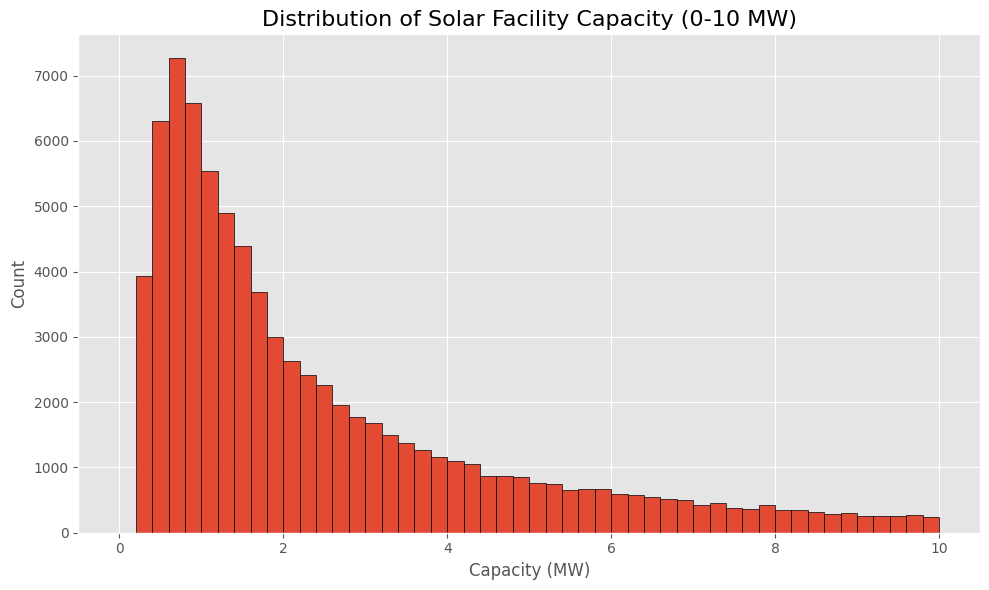

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['capacity_mw'], bins=50, range=(0, 10), edgecolor='black')
plt.title('Distribution of Solar Facility Capacity (0-10 MW)', fontsize=16)
plt.xlabel('Capacity (MW)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


Most of the Solar Cells Wattage lies around 0-10 MW

#### Histogram for latitude

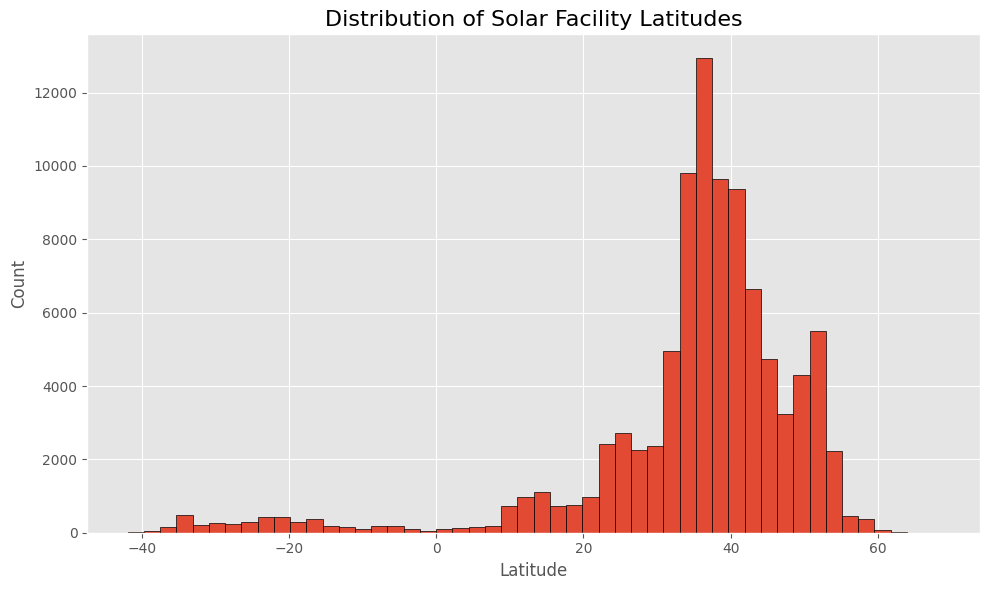

In [18]:

plt.figure(figsize=(10, 6))
plt.hist(df['latitude'], bins=50, edgecolor='black')
plt.title('Distribution of Solar Facility Latitudes', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


Most of the solar cells lie around 30-40 since most sunlight falls on that area 

#### Histogram for Solar Facility longitude

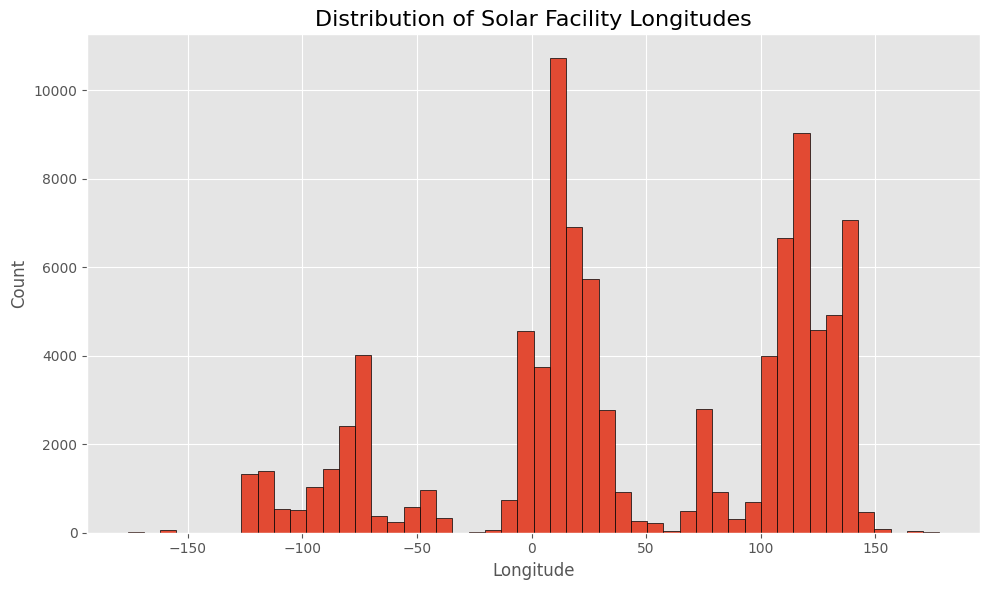

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['longitude'], bins=50, edgecolor='black')
plt.title('Distribution of Solar Facility Longitudes', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


The histogram shows the distribution of solar facilities by longitude, highlighting three major clusters:

Near 0° Longitude: Over 10,000 facilities, likely in Europe and Africa.

100-120° Longitude: Around 9,000 facilities, likely in East Asia (e.g., China).

-80° to -70° Longitude: Significant presence in North America.

Regions between clusters (e.g., oceans) have minimal facilities. Deployment aligns with landmass, solar resources, and supportive policies.

#### Line plot for construction dates

/tmp/ipykernel_7482/1457008906.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['constructed_before'] = pd.to_datetime(df['constructed_before'])


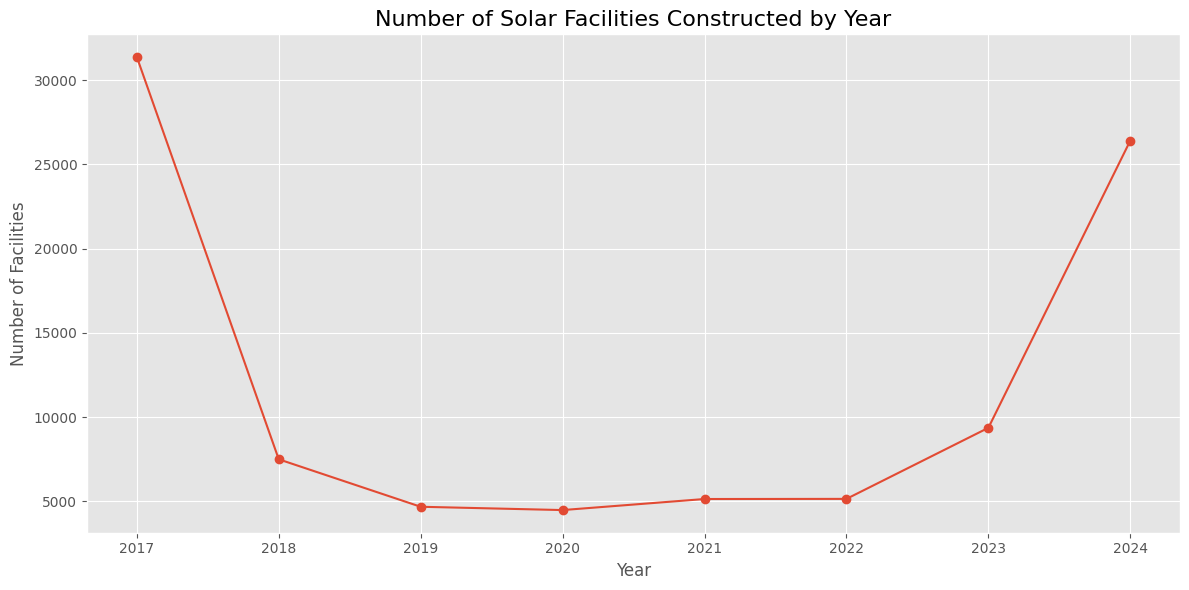

In [20]:
plt.figure(figsize=(12, 6))
df['constructed_before'] = pd.to_datetime(df['constructed_before'])
df['construction_year'] = df['constructed_before'].dt.year
year_counts = df['construction_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Solar Facilities Constructed by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### The graph shows the annual trend in solar facility construction from 2017 to 2024:
-2017 Peak: Over 30,000 facilities constructed, the highest in the dataset.

-2018 Decline: Sharp drop to ~10,000 facilities, likely due to policy or funding changes.

-2019-2022 Stagnation: Minimal growth (~5,000 facilities annually), indicating a slowdown.

-2023-2024 Surge: Rapid recovery, reaching ~25,000 facilities in 2024.

This reflects initial enthusiasm, followed by stagnation and renewed growth in recent years. External factors like policies and technology likely influenced these trends.

### Plotting the locations on a World Map for better analysis

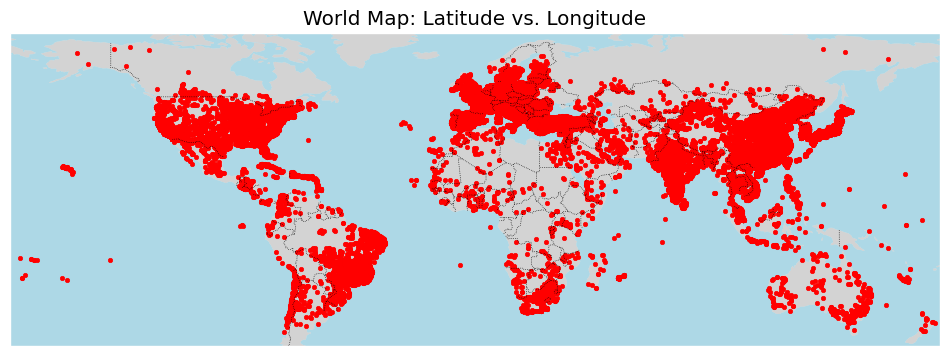

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot latitude vs longitude
ax.scatter(df["longitude"], df["latitude"],
           transform=ccrs.PlateCarree(),
           color="red", s=10)

plt.title("World Map: Latitude vs. Longitude")
plt.show()

Based on the world map scatter plot, areas with minimal or no coverage include:

Polar regions (Arctic and Antarctic)

Central Asia (parts of Kazakhstan, Mongolia)

Sahara Desert

Central Australia (Outback)

Amazon Rainforest interior

Northern Siberia

Greenland

Remote Pacific Ocean regions

Southern Ocean

Himalayan mountain range

These uncovered areas generally correspond to regions with extreme climates, very low population density, or challenging geographical features.

Related
Which regions are hardest to predict
How do climate patterns affect forecasting
What makes urban vs. rural forecasting different
How can historical data improve forecasting models
How does population density affect trend forecasting


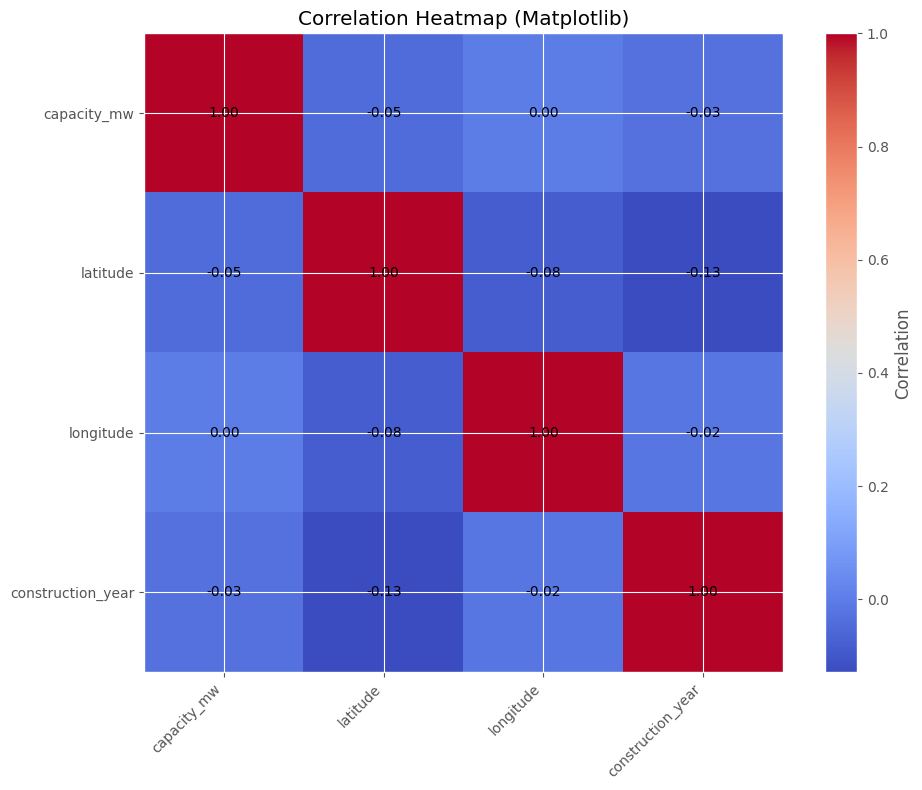

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation on numeric columns
corr = df.select_dtypes(include=[np.number]).corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, cmap="coolwarm", aspect="equal")

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label("Correlation")

# Label the axes with column names
ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)

# Optionally add text with correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center", color="black")

plt.title("Correlation Heatmap (Matplotlib)")
plt.tight_layout()
plt.show()